<a href="https://colab.research.google.com/github/Varchala/NaturalLanguageProcessing_CSC8980/blob/main/exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Varchaleswari Ganugapati**

vganugapati1@student.gsu.edu 

**Exam 1**

In [1]:
# !unzip /content/sample_data/exam1_dataset.zip -d /content/sample_data/

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#Data Extraction
def data_Extraction(df,fname):
  path='/content/sample_data/exam1_dataset/TRAINING/'
  path = path + fname
  with os.scandir(path) as files:
      for file in files:
          if file.name.endswith(".txt"):
              with open(path+"/"+file.name) as openfile:
                df = df.append({'data' : openfile.read(), 'labels':fname, 'name':file.name},ignore_index=True)
  return df

In [3]:
data = pd.DataFrame()
df1 = data_Extraction(data,"negative")
df1.head()

,data,labels,name
0,This is one of the most hateful and cruel movi...,negative,5947_1.txt
1,What Is It? is a mish-mash of bizarre recurrin...,negative,1353_1.txt
2,I watched SCARECROWS because of the buzz surro...,negative,5138_1.txt
3,"The film, a Universal release of a Protelco-ML...",negative,9750_1.txt
4,Don't really know where to start with one of t...,negative,11723_1.txt


In [4]:
df2 = data_Extraction(df1,"positive")
df2

,data,labels,name
0,This is one of the most hateful and cruel movi...,negative,5947_1.txt
1,What Is It? is a mish-mash of bizarre recurrin...,negative,1353_1.txt
2,I watched SCARECROWS because of the buzz surro...,negative,5138_1.txt
3,"The film, a Universal release of a Protelco-ML...",negative,9750_1.txt
4,Don't really know where to start with one of t...,negative,11723_1.txt
...,...,...,...
24995,I sense out there a mix of confusion and varyi...,positive,5954_7.txt
24996,H.G. Wells story the shape of things to come w...,positive,8109_10.txt
24997,"This one and ""Her Pilgrim Soul"" are two of my ...",positive,10314_8.txt
24998,Hayao Miyazaki has no equal when it comes to u...,positive,4082_10.txt


In [5]:
df2['labels'] = df2['labels'].map({'positive': 1, 'negative': 0}).astype(int)

In [6]:
df2.shape

(25000, 3)

In [7]:
df2

,data,labels,name
0,This is one of the most hateful and cruel movi...,0,5947_1.txt
1,What Is It? is a mish-mash of bizarre recurrin...,0,1353_1.txt
2,I watched SCARECROWS because of the buzz surro...,0,5138_1.txt
3,"The film, a Universal release of a Protelco-ML...",0,9750_1.txt
4,Don't really know where to start with one of t...,0,11723_1.txt
...,...,...,...
24995,I sense out there a mix of confusion and varyi...,1,5954_7.txt
24996,H.G. Wells story the shape of things to come w...,1,8109_10.txt
24997,"This one and ""Her Pilgrim Soul"" are two of my ...",1,10314_8.txt
24998,Hayao Miyazaki has no equal when it comes to u...,1,4082_10.txt


# **Question 1)** 
(20 points) Write a generic function that takes: Classification algorithm name,vectorization method name, training set with labels as parameters (total of 3 parameters should
be passed). The function should take the classification algorithm name, the vectorization
method’s name, and the training set and train the desired model. Use the default training
parameters for the models we have seen in class. This function should return the trained model.

In [9]:
from sklearn.pipeline import make_pipeline

In [10]:
def train_model(aName,vecName, trainSet):
  model = make_pipeline(vecName, aName)
  model.fit(trainSet.data, trainSet.labels)
  return model

# **Question 2)**
(30 points) Using the function from question 1 to build the following models:


a) Model a: Naive Bayes, Vectorizer: TFIDF and Bag of Words, Training set should be 75% of the provided dataset. Leaving the remaining 25% for testing.

b) Model b: RandomForest, Vectorizer: TFIDF and Bag of Words, Training set should be 70% of the provided dataset. Leaving the remaining 30% for testing.

c) Model c: Support Vector Machines (SVC in sklearn), Vectorizer: TFIDF and Bag of Words, Training set should be 60% of the provided dataset. Leaving the remaining 40% for testing.

NOTE: Set the random seed to: 12345. This needs to be consistently set to train the model AND split the data in test and train. If this is not done correctly, you will lose points as your answers will not be comparable with the grading key.


In [11]:
import random

In [12]:
# Setting a seed variable
seed_value= 12345
random.seed(seed_value)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
a_train, a_test = train_test_split(df2, test_size=0.25, random_state=seed_value)

In [15]:
# x_train

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
model_a_tfidf = train_model(MultinomialNB(),TfidfVectorizer(),a_train )
model_a_bow = train_model(MultinomialNB(),CountVectorizer(),a_train )

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
b_train, b_test = train_test_split(df2, test_size=0.30, random_state=seed_value)

In [20]:
model_b_tfidf = train_model(RandomForestClassifier(),TfidfVectorizer(),b_train )
model_b_bow = train_model(RandomForestClassifier(),CountVectorizer(),b_train )

In [21]:
from sklearn.svm import SVC

In [22]:
c_train, c_test = train_test_split(df2, test_size=0.40, random_state=seed_value)

In [23]:
model_c_tfidf = train_model(SVC(),TfidfVectorizer(),c_train )
model_c_bow = train_model(SVC(),CountVectorizer(),c_train )

# **Question 3)**
(30 points) Using the models from Question 2, evaluate each model with its respective training set (for model a, that set is 25% of the data, for model b, that set is 30% of the data, and for model c that set is 40% of the data. Be careful to not mix up the evaluation sets. With the predictions on the test set and show the following metrics: Accuracy, Precision, Recall, and Macro F1-score. With this in mind, please write and answer these questions in your notebook:

a) What model performs the best and why? (which metrics do you base this on, and why do you think it performs better than others).

b) Why is it important not to mix up the testing sets between different models? Think about this one.

c) Display in a single sorted dataframe (model name, training %, test %, accuracy, precision, recall, F1-score) all performance metrics, sorted by accuracy in descending manner.


In [24]:
import sklearn.metrics as sm

In [25]:
predictions_a_1 = model_a_bow.predict(a_test.data)
predictions_a_2 = model_a_tfidf.predict(a_test.data)

In [26]:
#Model a
print("Model a with bag of words vectorizer\n")
print('Accuracy:', sm.accuracy_score(a_test.labels,predictions_a_1))
print('Precision:', sm.precision_score(a_test.labels,predictions_a_1))
print('Recall:', sm.recall_score(a_test.labels,predictions_a_1))
print('F1 Score:', sm.f1_score(predictions_a_1, a_test.labels, average='macro'))

print("\nModel a with TF-IDF vectorizer\n")
print('Accuracy:', sm.accuracy_score(a_test.labels,predictions_a_2))
print('Precision:', sm.precision_score(a_test.labels,predictions_a_2))
print('Recall:', sm.recall_score(a_test.labels,predictions_a_2))
print('F1 Score:', sm.f1_score(predictions_a_2, a_test.labels, average='macro'))

Model a with bag of words vectorizer

Accuracy: 0.8496
Precision: 0.8634330925352597
Recall: 0.8221421552571241
F1 Score: 0.8492754961722391

Model a with TF-IDF vectorizer

Accuracy: 0.86368
Precision: 0.8645246770453793
Recall: 0.8548968227972487
F1 Score: 0.8635693396725295


In [27]:
predictions_b_1 = model_b_bow.predict(b_test.data)
predictions_b_2 = model_b_tfidf.predict(b_test.data)

In [28]:
#Model b
print("Model b with bag of words vectorizer\n")
print('Accuracy:', sm.accuracy_score(b_test.labels,predictions_b_1))
print('Precision:', sm.precision_score(b_test.labels,predictions_b_1))
print('Recall:', sm.recall_score(b_test.labels,predictions_b_1))
print('F1 Score:', sm.f1_score(predictions_b_1, b_test.labels, average='macro'))

print("\nModel b with TF-IDF vectorizer\n")
print('Accuracy:', sm.accuracy_score(b_test.labels,predictions_b_2))
print('Precision:', sm.precision_score(b_test.labels,predictions_b_2))
print('Recall:', sm.recall_score(b_test.labels,predictions_b_2))
print('F1 Score:', sm.f1_score(predictions_b_2, b_test.labels, average='macro'))

Model b with bag of words vectorizer

Accuracy: 0.8489333333333333
Precision: 0.8385291766586731
Recall: 0.856559608056614
F1 Score: 0.848919020257048

Model b with TF-IDF vectorizer

Accuracy: 0.8337333333333333
Precision: 0.830744071954211
Recall: 0.829613500272183
F1 Score: 0.8336604425999936


In [29]:
predictions_c_1 = model_c_bow.predict(c_test.data)
predictions_c_2 = model_c_tfidf.predict(c_test.data)

In [30]:
#Model c
print("Model c with bag of words vectorizer\n")
print('Accuracy:', sm.accuracy_score(c_test.labels,predictions_c_1))
print('Precision:', sm.precision_score(c_test.labels,predictions_c_1))
print('Recall:', sm.recall_score(c_test.labels,predictions_c_1))
print('F1 Score:', sm.f1_score(predictions_c_1, c_test.labels, average='macro'))

print("\nModel c with TF-IDF vectorizer\n")
print('Accuracy:', sm.accuracy_score(c_test.labels,predictions_c_2))
print('Precision:', sm.precision_score(c_test.labels,predictions_c_2))
print('Recall:', sm.recall_score(c_test.labels,predictions_c_2))
print('F1 Score:', sm.f1_score(predictions_c_2, c_test.labels, average='macro'))

Model c with bag of words vectorizer

Accuracy: 0.8526
Precision: 0.8342933947772657
Recall: 0.8767150928167877
F1 Score: 0.8525603446302918

Model c with TF-IDF vectorizer

Accuracy: 0.8921
Precision: 0.8789833822091887
Recall: 0.9071832122679581
F1 Score: 0.8920945604867941


a) What model performs the best and why? (which metrics do you base this on, and why do you think it performs better than others).

**answer**: SVM performs the best. 

Recall is: true positives/(true positives + false negatives). 

The recall score for svm with tfidf is 0.907 which is the highest of all. Choice of metrics depends on the business problem that is under question and the expected outcome from it. In my case, I would not mind watching a movie that is rated as good which is not that good or is bad but I do not want to miss a movie that is really good i.e. I am not ready to afford for False Negatives. 




b) Why is it important not to mix up the testing sets between different models? Think about this one.

**answer:** Every split of data into train and test was made in a different ratio and this would mean test data obtained by one kind of split for some model might contain the training data from the split for another model or vice versa. This may result in a model that could have been trained on the test data itself and the testing using the same data will result in misleading evaluations or bias as the test data is no more unseen or fresh.

In [31]:
# (model name, training %, test %, accuracy, precision, recall, F1-score)
metric_df = pd.DataFrame(columns=['model_name', 'training_%', 'test_%', 'accuracy', 'precision', 'recall', 'F1_score'])
#model a
metric_df = metric_df.append({'model_name':'Model a(Naive Bayes) tfidf', 'training_%':75, 'test_%':25, 'accuracy':sm.accuracy_score(a_test.labels,predictions_a_2), 'precision':sm.precision_score(a_test.labels,predictions_a_2), 'recall':sm.recall_score(a_test.labels,predictions_a_2), 'F1_score':sm.f1_score(predictions_a_2, a_test.labels, average='macro')},ignore_index=True)
metric_df = metric_df.append({'model_name':'Model a(Naive Bayes) bow', 'training_%':75, 'test_%':25, 'accuracy':sm.accuracy_score(a_test.labels,predictions_a_1), 'precision':sm.precision_score(a_test.labels,predictions_a_1), 'recall':sm.recall_score(a_test.labels,predictions_a_1), 'F1_score':sm.f1_score(predictions_a_1, a_test.labels, average='macro')},ignore_index=True)

#model b
metric_df = metric_df.append({'model_name':'Model b(Random Forest) tfidf', 'training_%':70, 'test_%':30, 'accuracy':sm.accuracy_score(b_test.labels,predictions_b_2), 'precision':sm.precision_score(b_test.labels,predictions_b_2), 'recall':sm.recall_score(b_test.labels,predictions_b_2), 'F1_score':sm.f1_score(predictions_b_2, b_test.labels, average='macro')},ignore_index=True)
metric_df = metric_df.append({'model_name':'Model b(Random Forest) bow', 'training_%':70, 'test_%':30, 'accuracy':sm.accuracy_score(b_test.labels,predictions_b_1), 'precision':sm.precision_score(b_test.labels,predictions_b_1), 'recall':sm.recall_score(b_test.labels,predictions_b_1), 'F1_score':sm.f1_score(predictions_b_1, b_test.labels, average='macro')},ignore_index=True)

#model c
metric_df = metric_df.append({'model_name':'Model c(SVM) tfidf', 'training_%':60, 'test_%':40, 'accuracy':sm.accuracy_score(c_test.labels,predictions_c_2), 'precision':sm.precision_score(c_test.labels,predictions_c_2), 'recall':sm.recall_score(c_test.labels,predictions_c_2), 'F1_score':sm.f1_score(predictions_c_2, c_test.labels, average='macro')},ignore_index=True)
metric_df = metric_df.append({'model_name':'Model c(SVM) bow', 'training_%':60, 'test_%':40, 'accuracy':sm.accuracy_score(c_test.labels,predictions_c_1), 'precision':sm.precision_score(c_test.labels,predictions_c_1), 'recall':sm.recall_score(c_test.labels,predictions_c_1), 'F1_score':sm.f1_score(predictions_c_1, c_test.labels, average='macro')},ignore_index=True)


In [32]:
metric_df = metric_df.sort_values(by='accuracy', ascending=False)

In [33]:
metric_df

,model_name,training_%,test_%,accuracy,precision,recall,F1_score
4,Model c(SVM) tfidf,60,40,0.892100,0.878983,0.907183,0.892095
0,Model a(Naive Bayes) tfidf,75,25,0.863680,0.864525,0.854897,0.863569
5,Model c(SVM) bow,60,40,0.852600,0.834293,0.876715,0.852560
1,Model a(Naive Bayes) bow,75,25,0.849600,0.863433,0.822142,0.849275
3,Model b(Random Forest) bow,70,30,0.848933,0.838529,0.856560,0.848919
2,Model b(Random Forest) tfidf,70,30,0.833733,0.830744,0.829614,0.833660


# **Question 4)**
(15 points) Using the documents in the folder named UNLABELED, please use your best performing trained model from question 3 to predict their labels. Please do this individually for each document. Print to the screen the following items: Document Name, Predicted Label and using a text cell, write your own opinion if the label is correct and why - note you have to read the document to make your own opinion.


In [90]:
path_un = '/content/sample_data/exam1_dataset/UNLABELED'
with os.scandir(path_un) as files:
      for file in files:
          if file.name.endswith(".txt"):
              with open(path_un+"/"+file.name) as openfile:
                # print(file.name)
                # print(openfile.read())
                label = model_c_tfidf.predict([openfile.read()])
                print("Document name: {}, Predicted label: {}".format(file.name,label[0]))

Document name: 24221_0.txt, Predicted label: 0
Document name: 37154_0.txt, Predicted label: 0
Document name: 35991_0.txt, Predicted label: 0
Document name: 46705_0.txt, Predicted label: 0
Document name: 49990_0.txt, Predicted label: 0
Document name: 36517_0.txt, Predicted label: 0
Document name: 0_0.txt, Predicted label: 1
Document name: 46278_0.txt, Predicted label: 0
Document name: 36022_0.txt, Predicted label: 0
Document name: 36149_0.txt, Predicted label: 0
Document name: 35968_0.txt, Predicted label: 1


**Opinion:**
All the labels are almost correct expect for the 46278_0.txt which did not much describe about the movie rather a kid who was excited to watch the movie shot in his school and he remembering nothing about the movie. Also for the first one 0_0.txt it seemed rather neutral opinion than positive and 35968_0.txt was more negative than positive.

# **Question 5)** 
(20 points) Build a function that takes the set of documents as input and returns a cosine similarity matrix for those documents. Feed all documents in the TRAINING folder to this matrix. Instead of printing the returned cosine similarity matrix, create a heatmap plot from the returned matrix. Make sure your plot is nicely scaled, properly labeled, and uses a nice color range to show the similarity.


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import linear_kernel

In [27]:
def similarity_func(docs):
  vectorizer = TfidfVectorizer(dtype=np.float32)
  tfidf_matrix = vectorizer.fit_transform(docs)
  # tfidf_matrix = tfidf_matrix.astype(np.float32)
  cs = cosine_similarity(tfidf_matrix, tfidf_matrix)
  # cs = linear_kernel(tfidf_matrix, tfidf_matrix)
  return cs

In [10]:
len(list(df2.data.values))

25000

In [28]:
cosine_sim = similarity_func(list(df2.data.values))

In [11]:
cosine_sim

array([[1.        , 0.08282121, 0.15076749, ..., 0.09588458, 0.10806241,
        0.10041153],
       [0.08282121, 1.        , 0.09140899, ..., 0.08324894, 0.07640991,
        0.1040033 ],
       [0.15076749, 0.09140899, 1.        , ..., 0.09731098, 0.0998828 ,
        0.10281268],
       ...,
       [0.09588458, 0.08324894, 0.09731098, ..., 0.99999994, 0.08411244,
        0.10659714],
       [0.10806241, 0.07640991, 0.0998828 , ..., 0.08411244, 1.        ,
        0.09020381],
       [0.10041153, 0.1040033 , 0.10281268, ..., 0.10659714, 0.09020381,
        1.0000002 ]], dtype=float32)

In [12]:
cosine_sim_df = pd.DataFrame(cosine_sim, columns=df2.name, index=df2.name)

In [13]:
cosine_sim_df

name,5947_1.txt,1353_1.txt,5138_1.txt,9750_1.txt,11723_1.txt,3244_3.txt,3105_3.txt,9902_3.txt,12029_4.txt,1977_1.txt,6681_1.txt,5542_4.txt,6383_3.txt,6653_3.txt,4345_1.txt,5013_1.txt,5176_1.txt,610_1.txt,3466_3.txt,11164_1.txt,2561_3.txt,5387_3.txt,457_3.txt,8202_4.txt,8569_4.txt,1294_1.txt,7380_2.txt,9861_3.txt,10891_1.txt,6536_3.txt,8918_3.txt,10213_1.txt,11540_2.txt,3611_4.txt,1221_4.txt,1497_2.txt,9998_4.txt,586_1.txt,12495_1.txt,11636_3.txt,...,2803_10.txt,11197_8.txt,8462_9.txt,3648_8.txt,7528_10.txt,3347_7.txt,12154_7.txt,11595_10.txt,5790_7.txt,7102_7.txt,4792_10.txt,2758_7.txt,8857_10.txt,2580_10.txt,372_10.txt,8632_9.txt,3670_10.txt,7089_9.txt,1230_10.txt,7237_10.txt,569_10.txt,2236_9.txt,9368_8.txt,1412_8.txt,9520_10.txt,11782_8.txt,6558_8.txt,715_10.txt,9782_10.txt,4568_10.txt,304_10.txt,7851_8.txt,12093_8.txt,8170_7.txt,3184_8.txt,5954_7.txt,8109_10.txt,10314_8.txt,4082_10.txt,4911_9.txt
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5947_1.txt,1.000000,0.082821,0.150767,0.109888,0.150393,0.161216,0.073087,0.063597,0.138219,0.126905,0.086806,0.157166,0.096968,0.112407,0.058628,0.101203,0.110824,0.195748,0.165149,0.130867,0.165508,0.164623,0.165705,0.131891,0.142526,0.134246,0.158665,0.156509,0.156272,0.079352,0.128166,0.188411,0.116199,0.186873,0.128972,0.121526,0.145820,0.112390,0.199620,0.139633,...,0.084957,0.102728,0.126877,0.072822,0.116948,0.114240,0.127330,0.086004,0.124801,0.105870,0.088990,0.145946,0.104856,0.050941,0.095935,0.076856,0.140022,0.151819,0.138988,0.046328,0.134246,0.118977,0.120732,0.077594,0.140808,0.147758,0.121213,0.066458,0.142289,0.074817,0.192089,0.068011,0.175988,0.084580,0.045766,0.096448,0.089524,0.095885,0.108062,0.100412
1353_1.txt,0.082821,1.000000,0.091409,0.072053,0.108860,0.139336,0.058900,0.039448,0.101153,0.087671,0.056385,0.123251,0.075117,0.062146,0.047918,0.068394,0.076030,0.125503,0.127399,0.077370,0.116353,0.097624,0.078296,0.098479,0.140195,0.110066,0.115196,0.095365,0.116709,0.089687,0.079422,0.143056,0.077776,0.139133,0.094098,0.094205,0.083735,0.067316,0.108900,0.093583,...,0.081102,0.098728,0.108735,0.048755,0.069728,0.078402,0.085314,0.096098,0.098032,0.067779,0.101644,0.068501,0.094965,0.068013,0.084605,0.043198,0.053273,0.107807,0.086487,0.050190,0.084594,0.077708,0.068769,0.057065,0.113394,0.088635,0.083175,0.036846,0.136409,0.042638,0.122181,0.064170,0.129451,0.060021,0.040083,0.065926,0.061854,0.083249,0.076410,0.104003
5138_1.txt,0.150767,0.091409,1.000000,0.090070,0.153746,0.143985,0.100591,0.071873,0.148338,0.149670,0.116451,0.164836,0.086990,0.124531,0.061389,0.106471,0.101395,0.187158,0.161460,0.110698,0.150353,0.137356,0.136696,0.136048,0.141688,0.153903,0.132820,0.088276,0.155504,0.073149,0.113024,0.160827,0.104620,0.194667,0.156911,0.102288,0.143160,0.081256,0.194292,0.104637,...,0.077050,0.115748,0.123913,0.077938,0.107218,0.091580,0.097028,0.055916,0.138457,0.089144,0.066482,0.130102,0.118671,0.059418,0.099316,0.051491,0.109489,0.144256,0.122494,0.054153,0.132584,0.089755,0.104858,0.073427,0.120585,0.130350,0.115719,0.070196,0.127502,0.070504,0.151960,0.098846,0.186800,0.087631,0.046634,0.091270,0.071326,0.097311,0.099883,0.102813
9750_1.txt,0.109888,0.072053,0.090070,1.000000,0.122979,0.116348,0.050721,0.051488,0.107829,0.083582,0.047637,0.129585,0.064509,0.099348,0.056925,0.074873,0.068103,0.178031,0.128084,0.125311,0.104656,0.126922,0.099478,0.111186,0.091584,0.128287,0.124163,0.083243,0.108550,0.071411,0.083371,0.112935,0.101797,0.157917,0.087308,0.077001,0.085396,0.068536,0.158565,0.087900,...,0.047643,0.097313,0.106363,0.060428,0.107520,0.105552,0.082054,0.059503,0.096338,0.075696,0.056978,0.126748,0.124752,0.039844,0.101048,0.060415,0.104362,0.146113,0.122297,0.046486,0.142007,0.076155,0.114354,0.068713,0.126256,0.108443,0.111410,0.055421,0.100640,0.046577,0.140946,0.080927,0.136757,0.099485,0.036900,0.077158,0.054059,0.067863,0.100589,0.078612
11723_1.txt,0.150393,0.108860,0.153746,0.122979,1.000000,0.1

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

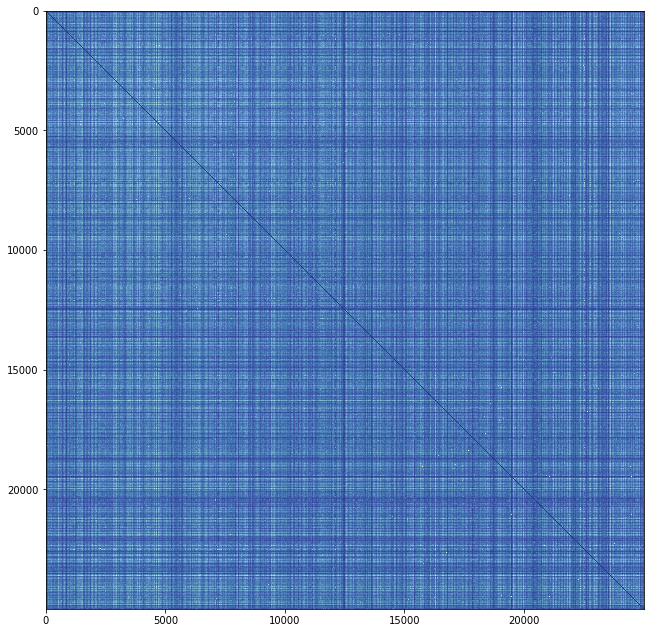

In [19]:
# sns.heatmap(cosine_sim)
# plt.style.use('seaborn-dark-palette')
plt.figure(figsize = (11,11))
plt.imshow(cosine_sim, cmap='RdYlBu_r', interpolation='nearest',vmin=0, vmax=1)
plt.show()

In [14]:
# cosine_sim

**Question 6)** 
(15 points) Write a function that takes a cosine similarity matrix as input and returns a list with the top n document paris and their similarity. Note that you should only keep the document pairs that are unique and remove the comparisons of the document to itself.Print the top 50 similar document pairs. Compare the assigned class for each document and answer: Do all similar documents belong to the same class? Why or why not?


In [23]:
def find_similar_docs(matrix,n):
  docs=[]
  final_doc=[]
  np.fill_diagonal(matrix, 0)
  n=n*2
  idx = np.argsort(matrix.ravel())[:-n-1:-1]
  similar = np.dstack(np.unravel_index(idx, matrix.shape))
  similar = similar[0]
  # print(similar[0][1])
  for i in range(0,n,2):
    docs.append(cosine_sim_df.columns[similar[i][0]])
    docs.append(cosine_sim_df.columns[similar[i][1]])
  for i in range(0,len(docs)-1,2):
    final_doc.append(docs[i]+" && "+docs[i+1]+" similarity: {}".format(cosine_sim_df.iloc[similar[i][0]][similar[i][1]]))
  return final_doc

In [24]:
out = find_similar_docs(cosine_sim.copy(),50)
# print(out)
print("The doc pairs are:")
for i in out:
  print(i)

The doc pairs are:
8278_10.txt && 8273_10.txt similarity: 1.0000003576278687
4987_1.txt && 7873_1.txt similarity: 1.0000003576278687
7873_1.txt && 4987_1.txt similarity: 1.0000003576278687
7729_7.txt && 7728_7.txt similarity: 1.000000238418579
10333_1.txt && 282_1.txt similarity: 1.000000238418579
5552_1.txt && 11976_1.txt similarity: 1.000000238418579
5089_1.txt && 6646_1.txt similarity: 1.000000238418579
10330_1.txt && 279_1.txt similarity: 1.000000238418579
11976_1.txt && 5552_1.txt similarity: 1.000000238418579
10178_10.txt && 10175_10.txt similarity: 1.000000238418579
972_9.txt && 973_9.txt similarity: 1.000000238418579
5954_1.txt && 5552_1.txt similarity: 1.000000238418579
11976_1.txt && 5954_1.txt similarity: 1.000000238418579
9423_4.txt && 4901_4.txt similarity: 1.000000238418579
7872_2.txt && 4986_2.txt similarity: 1.0000001192092896
6310_10.txt && 6319_10.txt similarity: 1.0000001192092896
5088_1.txt && 6645_1.txt similarity: 1.0000001192092896
6035_10.txt && 6036_10.txt simi

In [33]:
df2[df2['name']=='8278_10.txt']

,data,labels,name
23126,If you want Scream or anything like the big-st...,1,8278_10.txt


In [34]:
df2[df2['name']=='8273_10.txt']

,data,labels,name
22594,If you want Scream or anything like the big-st...,1,8273_10.txt


Apologies for a bit weird similarities output, changing precision to float32 from float64 could be the reason and also with float64, it was impossible for me to run this code on colab or my pc. However, with an understanding of the similarity values otherwise and also reading the docs, I understand that mostly all similar documents belong to the same class the most important reason being the common words decribing one particular aspect/sentiment like bad,good,terrific,terrible, etc.,are mostly found in similar documents. and the tf-idf vectorizer choosen also vastly depends on the frequency of words found in a document.

# **Question 7)**
(20 points) Using Spacy’s part of speech tagger, process all sentences (hint: don’t
forget to split the reviews) and count how many NOUN and VERB tags are found in all the
movies review (TRAINING folder) separating them by label. In other words, how many NOUN
and VERB tags are found in positive reviews, and how many NOUN and VERB tags are found
in negative reviews. Answer the following question: When comparing both, do you see any
differences? Why do you think about the differences? Or lack of them.

In [36]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [45]:
doc_p = ""
row_n = pd.DataFrame()
row_p = pd.DataFrame()
count_n = []
count_p = []
doc_n= ""

for j in df2.loc[df2.labels == 0].data[1:50]:
  doc_n = nlp(j)
  for t in doc_n:
  #     print(token.text, token.lemma_, token.pos_)
        row_n = row_n.append({'text':t.text, 'pos':t.pos_},ignore_index=True)

for j in df2.loc[df2.labels == 1].data[1:50]:
  doc_p = nlp(j)
  for t in doc_p:
  #     print(token.text, token.lemma_, token.pos_)
        row_p = row_p.append({'text':t.text, 'pos':t.pos_}, ignore_index=True)


In [46]:
row_p[row_p['pos']=='NOUN']

,pos,text
1,NOUN,priest
6,NOUN,ministry
10,NOUN,man
18,NOUN,movie
23,NOUN,dilemma
...,...,...
14495,NOUN,father
14498,NOUN,brother
14502,NOUN,separation
14523,NOUN,humor


In [47]:
count_n.append(list(row_n['pos']).count('NOUN'))
count_n.append(list(row_n['pos']).count('VERB'))

count_p.append(list(row_p['pos']).count('NOUN'))
count_p.append(list(row_p['pos']).count('VERB'))


In [48]:
print(count_n)
print(count_p)

[2041, 1381]
[2226, 1545]


Apologies again, this piece of code ran really well for few sets of docs otherwise the entire document list is taking enternal time to execute. As the time is less and did not want to lose up on other topics and also wanted to show the workability of this code,so I chose to execute with less number of input sets.

From a fundamental understanding of what I have by seeing the counts of noun and verb tags for negative and positive labels, I can clearly see that the parts of speech ,irrespective of the sentiment, exists almost equally in every sentence based on what the meaning demands or the sentence wants to convey.

# **Question 8)**

(20 points) Using the results from the PoS process in question 7, count how many
different PUNCT tags are found and their respective counts from the full dataset provided (both
negative and positives together). Using regex, write a set of regular expressions that generate
the same counts from the dataset without using NLTK or Spacy, just regex. Can you get the
same counts? If not, why do you think this is?

In [53]:
count_punct = list(row_p['pos']).count('PUNCT')
count_punct += list(row_n['pos']).count('PUNCT')
pos_df = pd.concat([row_p[row_p['pos'] =='PUNCT'],row_n[row_n['pos'] =='PUNCT']],axis=0)
print(pos_df.groupby(['text','pos']).size())


text           pos  
!              PUNCT     60
"              PUNCT    240
"--Emperor     PUNCT      1
'              PUNCT     96
's             PUNCT      1
                       ... 
cycle.<br      PUNCT      1
it.<br         PUNCT      1
more.<br       PUNCT      1
nonsense?)<br  PUNCT      1
              PUNCT      4
Length: 120, dtype: int64


# **Bonus Question:**

(40 points) 

Using the code from Class 09 - Word Embeddings, pre-tune
BERT in order to classify movie reviews. You can use the full TRAINING folder for the tuning
and use the UNLABELED folder for your final classification/prediction task. Do the label
predictions from BERT match what your classifier from Question 4 predicted? If they don’t, are
they better? Please say why. NOTE: This is a pro-level task and while you might be
tempted to copy code from the Internet, do not do it, as you will fail the class if you are
plagiarizing. The code from the class can be tweaked to do the task with some
adjustments. This is definitely not easy, but that is why it is worth an extra 40 points!

In [55]:

!pip install transformers

     |████████████████████████████████| 1.9MB 7.2MB/s 
     |████████████████████████████████| 3.2MB 32.7MB/s 
     |████████████████████████████████| 890kB 52.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=1a4f9a80c2f5c54a17c7624b753b8479c3ad784aa12e0eabdad8b41ebc333eca
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [56]:
import tensorflow as tf
import torch
from transformers import BertTokenizer

In [57]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [58]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [59]:
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in df2.data.values:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True,        # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=1)
attention_masks = torch.cat(attention_masks, dim=1)


In [65]:
labels = torch.tensor(df2.labels.values)

# Print sentence 0, now as a list of IDs.
print('Original: ', df2.data.values[0])
print('Token IDs:', input_ids[0])

Original:  This is one of the most hateful and cruel movies I've seen in a long time. Sadly I was duped into sticking with it, since Donald Sutherland's presence misleadingly gave it some credibility. [That's the last time that'll happen.]<br /><br />Lesley Ann Warren's character was annoyingly whiny and as stupid as they come. There were smarter characters than hers who were killed in the film. Thats just one of many things in this movie that made me ask, "Where is the justice?"<br /><br />Why is late-night cable so filled with sadistic garbage filled with pathological mayhem? Most of these films seem to have a particular problem with women, and seem to focus on them being terrorized and murdered. This film could have been every bit as suspenseful without being sick and twisted in the process. All it ends up doing is turning the viewer's stomach with its sickness, and insulting the viewer's intelligence.<br /><br />The cast is misleadingly good. My guess is that they BAGGED Sutherland

In [69]:

from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(df2.data.values))
val_size = len(df2.data.values) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(df2.data.values, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

AssertionError: ignored

In [ ]:

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:

from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [ ]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:

from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [ ]:
path_un = '/content/sample_data/exam1_dataset/UNLABELED'
df = pd.DataFrame()
with os.scandir(path_un) as files:
      for file in files:
          if file.name.endswith(".txt"):
              with open(path_un+"/"+file.name) as openfile:
                # print(file.name)
                # print(openfile.read())
                df = df.append([openfile.read()])

In [ ]:
import pandas as pd

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
